# Exercise 3 - Sampling

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing
- To introduce uniform quantization

In [68]:
import os
os.makedirs('results/ex3', exist_ok=True)

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 3.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900"/>
<center>Figure 3.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 3.2. 

<img src="img/ex2_2.svg" alt="drawing" width="900"/>
<center>Figure 3.2: Frequency domain representation of $x(t)$ and $s(t)$</center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900"/>
<center>Figure 3.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $f_s=8000$ Hz and varying:

$(\text{i}) \:  f=150$ Hz, $\quad  (\text{ii}) \: f=300$ Hz, $\quad (\text{iii}) \: f=600$ Hz 

$(\text{iv}) \:  f=7400$ Hz, $\quad (\text{v}) \:  f=7700$ Hz $\:$ and $\: (\text{vi}) \:  f=7850$ Hz

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

for N in [150, 300, 600, 7400, 7700, 7850]:
    fs = 8000
    fsig = N # change the value of fsig for parts (i) to (vi)
    Nsamp = 100
    t, x = sinegen(fs, fsig, Nsamp)

    plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
    plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
    plt.close()

The plots created above (e.g. `ex3_sine_150_hz.pdf`) will have also been saved to the `/results/ex3/` folder so you now have a record of all the plots.

**Question 3.1** Describe and discuss the results for (i)-(iii) and (iv)-(vi).

>**Answer 3.1** Between (i)-(iii), as expected, the frequency of the sine wave increases. However, between (iv)-(vi), the frequency of the sine wave decreases despite the increasing the signal frequency parameter, `fsig` in `sinegen()`. 
>
>This is due to the us changing the signal frequency, `fsig`, but maintaining the sampling frequency `fs`. As `fs` has been set to 8000Hz, the corresponding Nyquist Frequency is: $$\text{(Nyquist Frequency)} = \frac{f_s}{2} = \frac{8000}{2} = 4000 \text{Hz}$$
>This means that for any signal frequencies greater than 4000Hz, such as in (iv)-(vi), the signal is undersampled and will be aliased.

>NOTE: Observe that for (iv)- (vi), the aliased signals are just flipped versions of the signals from (iii)-(i). Notice that the frequencies sum up to give $8000\text{Hz}$ which is $2*\text{Nyquist Frequency}$. Because they sum to give $8000\text{Hz}$, the signals (iv)-(vi) have $\pi$ phase difference from the original signal.


**Question 3.2** Predict the results for frequencies $f=24150$ Hz, $\: f=24300$ Hz and $\: f=24600$ Hz and confirm your prediction with Python.

>**Answer 3.2**
>For all three frequencies, we expect the signals to be aliased as the sampling frequency still has not changed, and consequently, the Nyquist Frequency also will remain the same. 
>
>For the same reasons as in **3.1**, we can calculate that the signals can be decomposed:
>$$
f_1 = 24150 = 24000 + 150\\
f_2 = 24300 = 24000 + 300\\
f_3 = 24600 = 2400 + 600\\
>$$
>
>As $24000$ is can be broken into $6*4000$, and the frequencies are above $24000$, we can infer that that the sampled signal will be aliased to appear identical to:
>
>$$
f_1 \rarr 150\text{hz}\\
f_2 \rarr 300\text{hz}\\
f_3 \rarr 600\text{hz}\\
>$$
>
>In general, the aliased signal will appear in accordance to:
>$$\text{signal frequency} = n*\text{Nyquist Frequency} + \text{aliased frequency}$$
>Where odd values of `n` denote a phase difference of $\pi$

In [70]:
for N in [24150, 24300, 24600]:
    fs = 8000
    fsig = N # change the value of fsig for parts (i) to (vi)
    Nsamp = 100
    t, x = sinegen(fs, fsig, Nsamp)

    plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
    plt.savefig('results/ex3/ex3_sine_' + str(fsig) + '_hz.pdf')
    plt.close()

**Question 3.3** Consider $x(t)=\cos(100\pi t)$

$\quad$(a) Determine the minimum sampling rate to avoid aliasing

$\quad$(b) Write down an expression for $x[n]$ if a sampling frequency of 200 Hz is used.

$\quad$(c) Write down an expression for $x[n]$ if a sampling frequency of 75 Hz is used.

>**Answer 3.3**
>
>(a) The function $x(t) = cos(100\pi t)$ has a frequency of $50\text{Hz}$. Aliasing can be avoided by ensuring that: $$|{f_m}| \lt \frac{f_s}{2} \xrightarrow{} f_s \gt 2|f_m|$$
>
>In our case, where $f_m = 50 \text{Hz}$, we can see that at $f_s$ must be greater than $100\text{Hz}$.
>
>NOTE: All parts (b) and (c) are asking is for x(t) to be written as per sampling theory:$$x[n] = x(nT_s) \quad \text{ where } \quad T_s = \frac{1}{f_s}$$ 
>
>(b) As $f_s = 200 \text{Hz}$, we can write x[n] as: $$x[n] = x\biggl(\frac{n}{200}\biggr)$$
>
>(c) As $f_s = 75 \text{Hz}$, we can write x[n] as: $$x[n] = x\biggl(\frac{n}{75}\biggr)$$

**Question 3.4** If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

>**Answer 3.4** 
>
>NOTE: Recall from EX1 that the normalised angular frequency, $\Omega$ is defined as:
>$$\Omega = \frac{\omega}{f_s} = 2\pi\frac{f}{f_s}=2\pi F, \quad \text{where} \quad F = \frac{f}{f_s} \text{ and } \omega = 2\pi f$$
>
>Hence, we can calculate that the normalised angular frequency will be:
>$$\Omega = 2\pi\frac{1.2}{48} = \frac{\pi}{20} = 0.157...$$

**Question 3.5** Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?


>**Answer 3.5** Rearranging the same formula:
>$$f = \frac{\Omega}{2\pi} f_s = \frac{\frac{\pi}{4}}{2\pi} f_s = \frac{1}{8}f_s

### Uniform quantization change to Q

Sampling is the process by which a continuous-*time* signal, $x(t)$,  becomes a discrete-*time* signal, $x[n]$. Quantization, on the other hand, is the process by which a signal with continuous amplitude is made to assume discrete amplitudes from a defined set of **quantization levels**.

Let us consider a signal $x(t)$ with amplitudes contained in the range $\pm A$. It is quantized using a simple uniform quantizer with $Q$ equally-spaced quantization levels such that the quantization step is $W=\frac{2A}{Q-1}$. The quantized signal $x_q(t)$ is obtained by rounding the amplitude of $x(t)$ to the closest quantization level, or equivalently
$$x_q(t)=W\cdot \text{round}\big(\frac{x(t)}{W}\big)$$

For example, for $A=10$ and $N=21$, the quantization step is $W=1$ and an amplitude of $x(\tau)=9.2$ would lead to $x_q(\tau)=9$.

The quantization error is the difference between the original signal $x(t)$ and the quantized signal $x_q(t)$. 

<img src="img/ex3_quant.svg" alt="drawing" width="900"/>
<center>Figure 3.4: The sampling and quantization processes</center>

**Question 3.6** For the example above ($A=10$, $Q=21$, and $W=1$), give the maximum and minimum values that the quantization error can take.

>**Answer 3.6** The quantization error refers to the difference between the original signal and the quantized signal. Therefore, it stands to reason that the maximum and minimum quantization error will take place when the signal sits equidistant between two quantization levels. Hence:
>$$\text{error}_{max} = \frac{W}{2} = 0.5 \quad \text{and} \quad \text{error}_{min} = -\frac{W}{2} = -0.5$$


**Question 3.7** Implement the simple quantizer described above using your own `quantizer` function in the cell below. Plot a sine wave of amplitude $10$ quantized using $21$ levels.

In [90]:
def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels

    # add your code here
    levels = np.linspace(dynrange[0], dynrange[1], N)
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = levels[np.argmin(np.abs(levels - x[i]))]
    
    return y

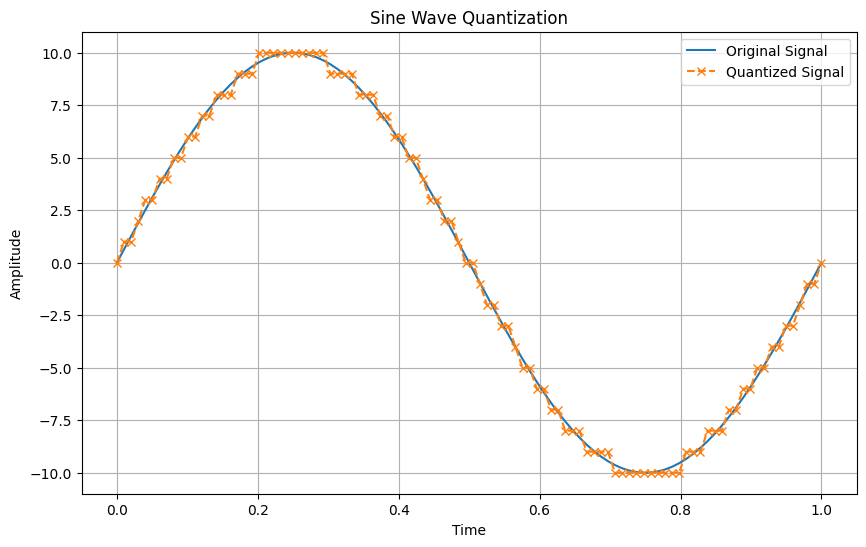

In [108]:
# plot a quantized sine wave here
amplitude = 10
N = 21  # Number of quantization levels
t = np.linspace(0, 1, 100)  # Time values
x = amplitude * np.sin(2 * np.pi * t)

dynrange = [-amplitude, amplitude]

quantized_signal = quantizer(x, dynrange, N)

# Plot the original signal and the quantized signal
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Original Signal')
plt.plot(t, quantized_signal, label='Quantized Signal', linestyle='--', marker='x')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave Quantization')
plt.legend()
plt.grid(True)
plt.savefig('results/ex3/ex3_sine_wave_quantization.pdf')
plt.show()

**Question 3.8** Plot the quantization error for the sine wave in Question 3.7. Does your result match your answer to Question 3.6? What is the root mean square (RMS) error? Compare this to Exercise 8 of Problem Sheet 3.

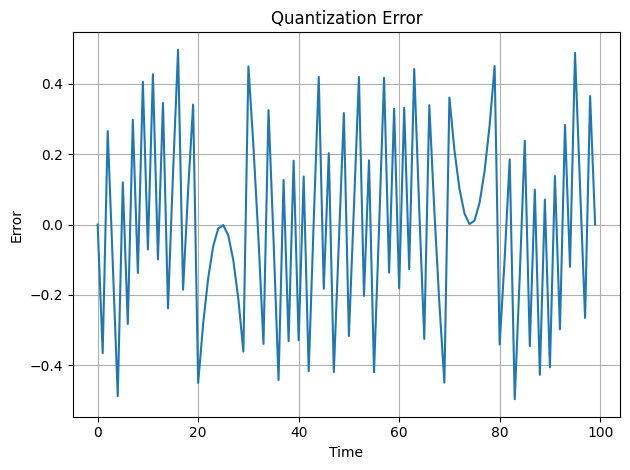

In [109]:
# plot quantization error here
quant_error = x - quantized_signal
plot_signal(quant_error, title='Quantization Error', xlabel='Time', ylabel='Error')
plt.savefig('results/ex3/ex3_quantization_error.pdf')

In [107]:
# RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(x, quantized_signal, squared=False)
print(f'The RMSE of the quantized signal is: {rmse:.3f}')

The RMSE of the quantized signal is: 0.275
